***Alumna:*** Karla Ivette Zamduio Montoro  ***Matricula:***1916955


lunes,Miercoles Viernes   
  **Hora clase:**N1 

**Objetivo**
Comprender los conceptos básicos de las redes neuronales artificiales y su uso en tareas de clasificación de imágenes. 

Aprender a utilizar Python y TensorFlow para entrenar una red neuronal artificial.

Entrenar una red neuronal artificial en el conjunto de datos MINIST para clasificar digitos escritos a mano. 

Evaluar el rendimiento del modelo entrenado.

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras


# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)




2.12.0


***Importar el set de datos  de MNIST.***

---



La base de datos MNIST es un conjunto de datos de dígitos escritos a mano. Tiene 60.000 muestras de entrenamiento y 10.000 muestras de prueba. Cada imagen está representada por 28x28 píxeles, cada uno con un valor de 0 a 255 con su valor de escala de grises.

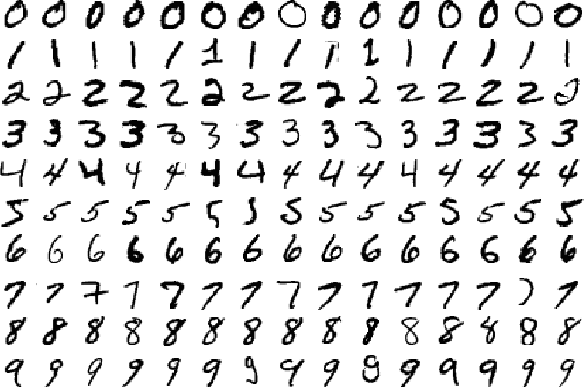




In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

***Explore el set de datos***


---


Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [6]:
x_train.shape 

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:


In [7]:
len(y_train)

60000

Cada etiqueta es un integro entre 0 y 9:

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [9]:
x_test.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [10]:
len(x_test)

10000

***Pre-procese el set de datos***


---


El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

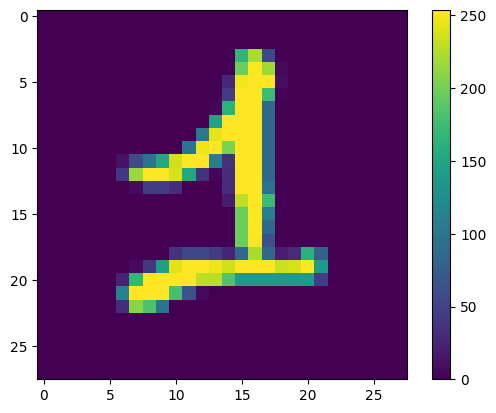

In [12]:
plt.figure()
plt.imshow(x_train[24])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [13]:
x_train = x_train/255.0
x_test  = x_test/255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

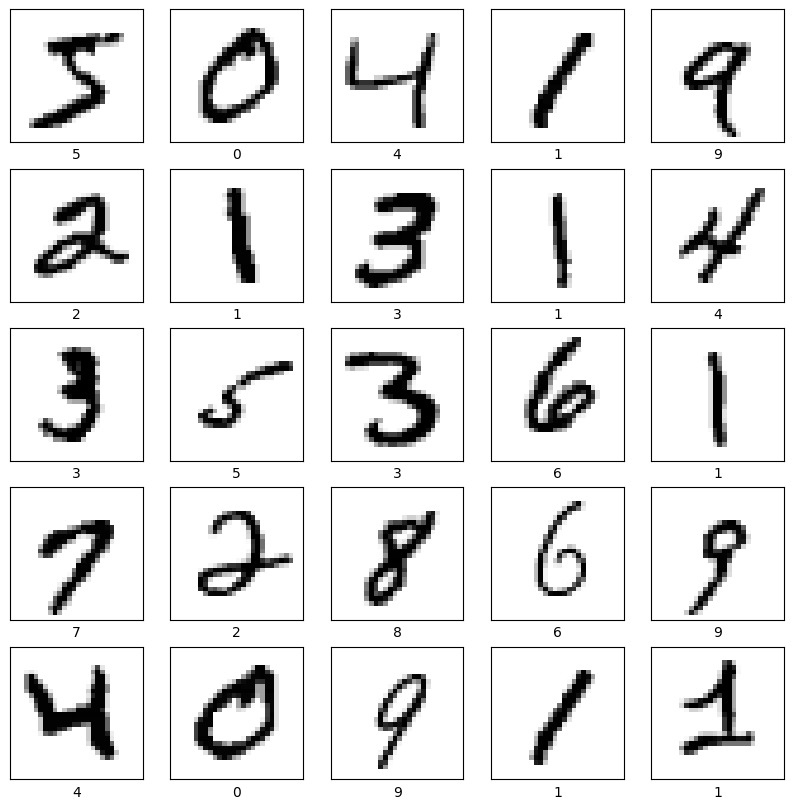

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

***Construccion del Modelo***


---


Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

***Configurar las Capas***

Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

***Compilación del modelo***

---


Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

*Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.

*Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

*Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

***Entrenar el Modelo***


---


*Entrenar el modelo de red neuronal requiere de los siguientes pasos:*

Entregue los datos de entrenamiento al modelo. En este ejercicio , el set de datos de entrenamiento estan en los arreglos ***x_train***  y      ***y_train***

El modelo aprende a asociar imagenes y etiquetas.
Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo x_test. Verifique que las predicciones sean iguales a las etiquetas de el arreglo y_test.
Para comenzar a entrenar, llame el **metodo model.fit**, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [17]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2617 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1154 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0787 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0575 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0346 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.99 (o 99%) sobre el set de datos de entrenamiento.



***Evaluar Exactitud***


---


Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [18]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0776 - accuracy: 0.9790 - 771ms/epoch - 2ms/step

Test accuracy: 0.9789999723434448


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). El Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

***Hacer predicciones***


---


Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera prediccion:

In [20]:
predictions[0]

array([1.9484553e-10, 5.5197524e-10, 2.9058229e-09, 1.2953063e-04,
       3.2059422e-13, 4.1560063e-12, 1.4391107e-15, 9.9987054e-01,
       6.3479173e-09, 2.1118137e-08], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 numeros manuscritos .Aqui pueden revisar cual tiene el nivel mas alto de confianza:

In [21]:
np.argmax(predictions[0])

7

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o class_names[7]. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [23]:
y_test[0]

7

***Grafique esto para poder ver todo el set de la prediccion de las 10 clases.***

---



In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

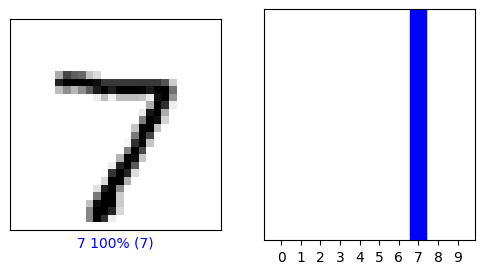

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

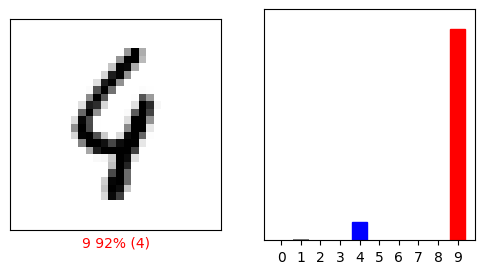

In [59]:
i = 115
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

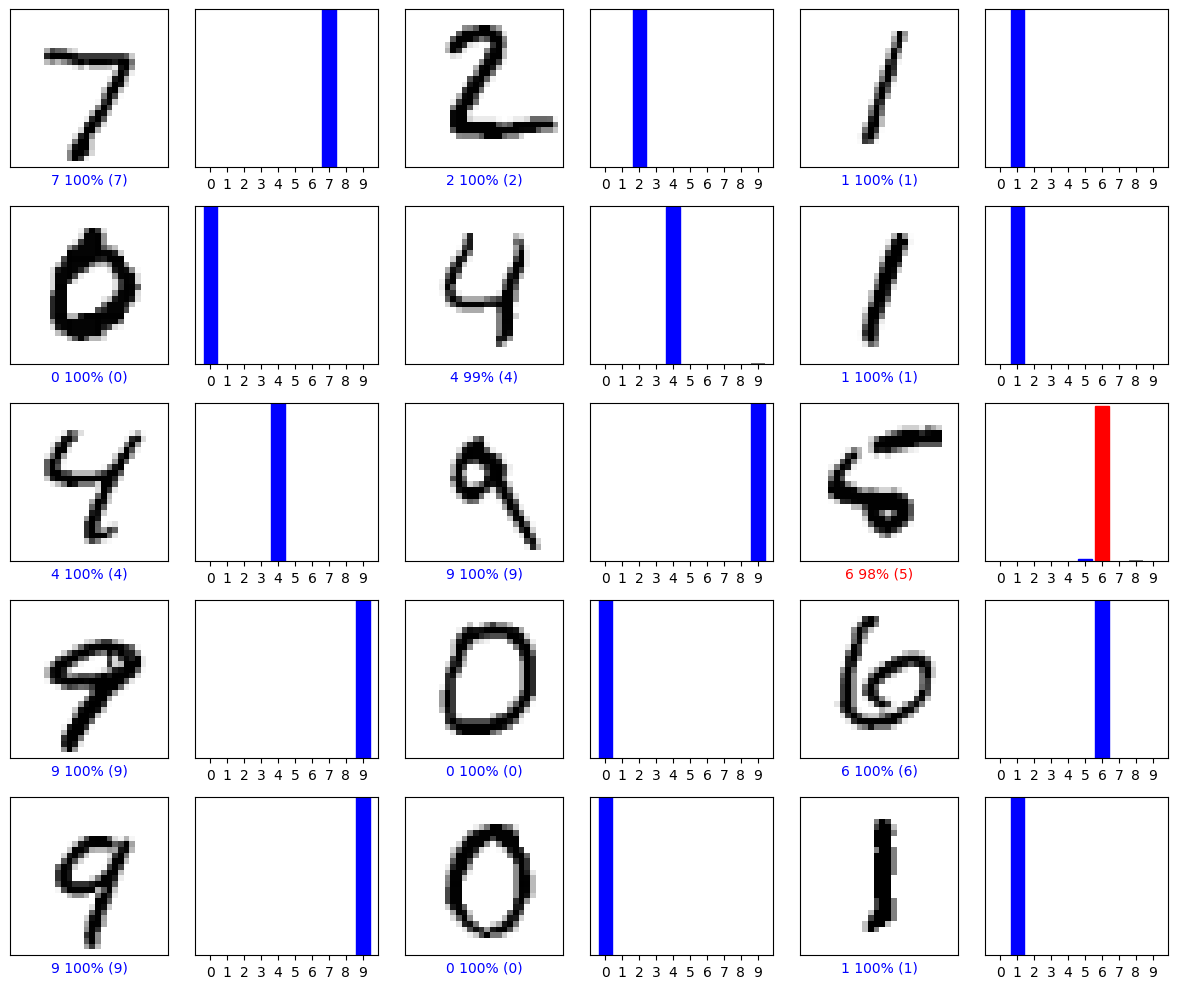

In [46]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [47]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


Los modelos de tf.keras son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [48]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [49]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 36ms/step
[[7.1841463e-11 1.5659509e-06 9.9999845e-01 1.6042025e-10 4.1049731e-23
  3.2203757e-09 1.4333974e-10 2.3044245e-20 5.4082491e-08 1.1512039e-19]]


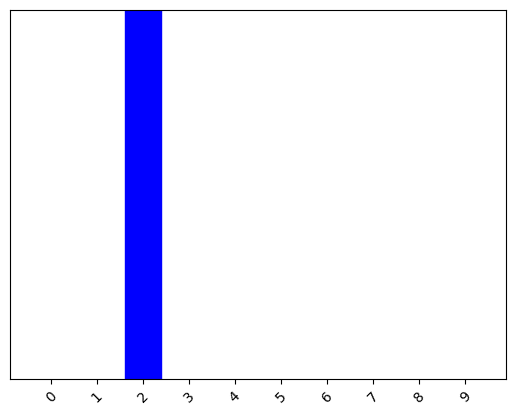

In [50]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

*model.predict* retorna una lista de listas para cada imagen dentro del batch o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del batch o bloque:

In [51]:
np.argmax(predictions_single[0])

2